### Imports

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import sys
sys.path.append('../Category_Analysis')
sys.path.append('../Functions')
from plots_fabi import *

### Load Dataset

In [2]:
df = pd.read_csv('data/news_actual_preprocessed.csv')

In [3]:
# Rename sentiment
df.sentiment = ['Good' if val == 1 else 'Bad' for val in df.sentiment]

***
## Times

In [4]:
conv = {
    'BBC': '%Y-%m-%dT%H:%M:%S',
    'CNN': '%Y-%m-%dT%H:%M:%SZ'
}

df.date_published = [datetime.strptime(time, conv[pub]) for time, pub in zip(df.date_published.values, df.publisher.values)]

In [5]:
def to_datetime(time):
    return datetime.utcfromtimestamp(time.astype(int) * 1e-9)

In [6]:
df['day_published'] = [to_datetime(time).day for time in df.date_published.values]
df['weekday_published'] = [to_datetime(time).weekday() for time in df.date_published.values]
df['month_published'] = [to_datetime(time).month for time in df.date_published.values]
df['year_published'] = [to_datetime(time).year for time in df.date_published.values]

# 4 Articles from 2019, 9 Articles from 2020, Remove them
df = df[df.year_published > 2019]

# Remove Articles from before November
df = df[df.month_published > 10]

# Remove Articles from before November 10
limit = datetime.strptime('2020-11-10', '%Y-%m-%d')
df = df[[(pub-limit).days > 0 for pub in df.date_published]]

***
### Articles published per day

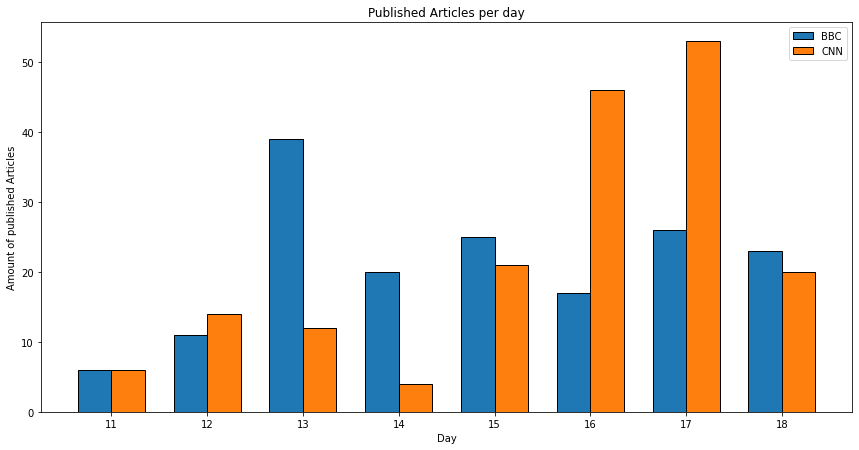

In [7]:
x = np.unique(df.day_published.values)
published = df.groupby('publisher').day_published.value_counts()
y = {}
for pub in df.publisher.unique():
    keys = list(published[pub].keys())
    vals = list(published[pub].values)
    # Insert missing values
    if len(keys) < len(x):
        for x_value in x:
            if x_value not in keys:
                keys.append(x_value)
                vals.append(0)

    _, vals = zip(*sorted(zip(keys, vals)))
    y[pub] = vals

bar_adjacent_labels(x, y, title='Published Articles per day', xlabel='Day', ylabel='Amount of published Articles')

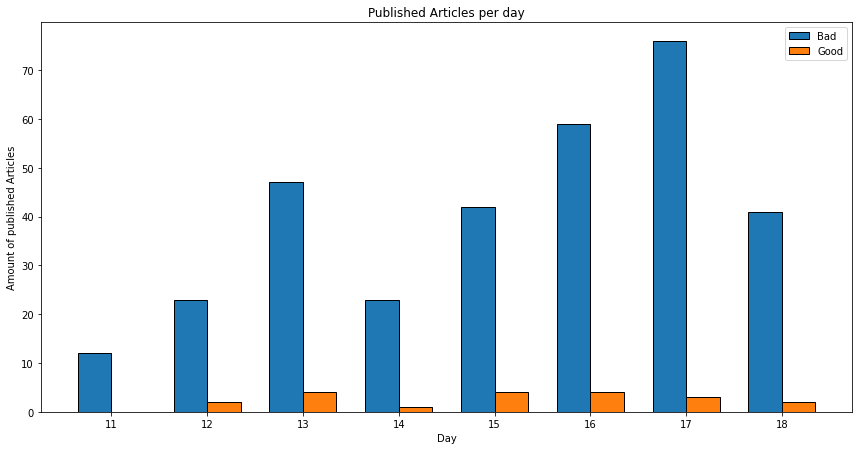

In [8]:
x = np.unique(df.day_published.values)
published = df.groupby('sentiment').day_published.value_counts()
y = {}
for sent in df.sentiment.unique():
    keys = list(published[sent].keys())
    vals = list(published[sent].values)
    # Insert missing values
    if len(keys) < len(x):
        for x_value in x:
            if x_value not in keys:
                keys.append(x_value)
                vals.append(0)

    _, vals = zip(*sorted(zip(keys, vals)))
    y[sent] = vals

bar_adjacent_labels(x, y, title='Published Articles per day', xlabel='Day', ylabel='Amount of published Articles')

***
### Articles published per weekday

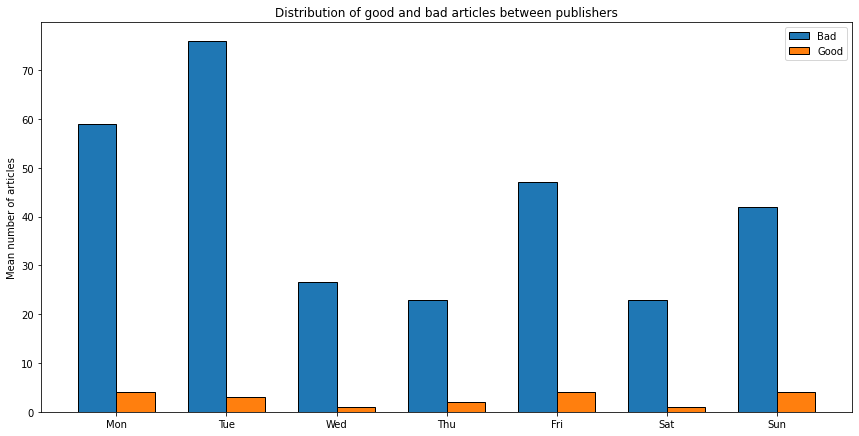

In [9]:
# Count occurence of each weekday
l = []
for date in df.date_published:
    l.append((date.weekday(), date.day))
u = np.unique(l, axis=0)
weight = pd.DataFrame({'day': [i[0] for i in u]}).day.value_counts(sort=False)


x = np.sort(np.unique(df.weekday_published.unique()))
published = df.groupby('sentiment').weekday_published.value_counts()
y = {}
for sent in df.sentiment.unique():
    keys = list(published[sent].keys())
    vals = list(published[sent].values)
    # Insert missing values
    if len(keys) < len(x):
        for x_value in x:
            if x_value not in keys:
                keys.append(x_value)
                vals.append(0)

    _, vals = zip(*sorted(zip(keys, vals)))
    # Get mean
    vals = [v/w for v, w in zip(vals, weight)]
    y[sent] = vals

# Rename x
x = [{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat',  6: 'Sun'}[x_] for x_ in x]

bar_adjacent_labels(
    x, y,
    title='Distribution of good and bad articles between publishers',
    ylabel='Mean number of articles')

***
### Distribution between good and bad

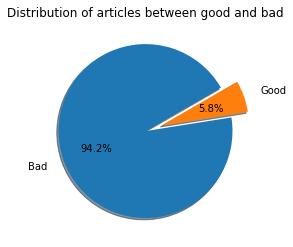

In [10]:
plt.pie(df.sentiment.value_counts().values,
explode=(0,0.2), autopct='%1.1f%%',
labels=df.sentiment.value_counts().keys(),
startangle=30, labeldistance=1.2,
shadow=True)
plt.title('Distribution of articles between good and bad');

***
### Distribution between categories

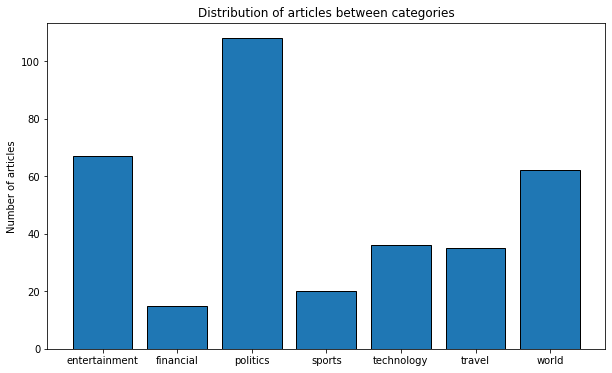

In [11]:
x, y = zip(*sorted(zip(df.category.value_counts().keys(), df.category.value_counts().values)))
plt.figure(figsize=(10,6))
plt.bar(x, y, edgecolor='black')
plt.title('Distribution of articles between categories')
plt.ylabel('Number of articles');

***
### Distribution of good and bad between categories

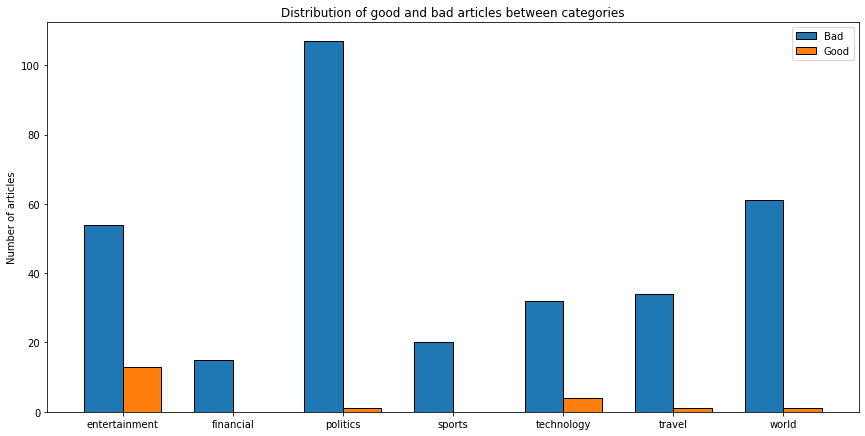

In [12]:
x = np.sort(np.unique(df.category.unique()))
published = df.groupby('sentiment').category.value_counts()
y = {}
for sent in df.sentiment.unique():
    keys = list(published[sent].keys())
    vals = list(published[sent].values)
    # Insert missing values
    if len(keys) < len(x):
        for x_value in x:
            if x_value not in keys:
                keys.append(x_value)
                vals.append(0)

    _, vals = zip(*sorted(zip(keys, vals)))
    y[sent] = vals

bar_adjacent_labels(
    x, y,
    title='Distribution of good and bad articles between categories',
    ylabel='Number of articles')

***
### Distribution good bad between publishers

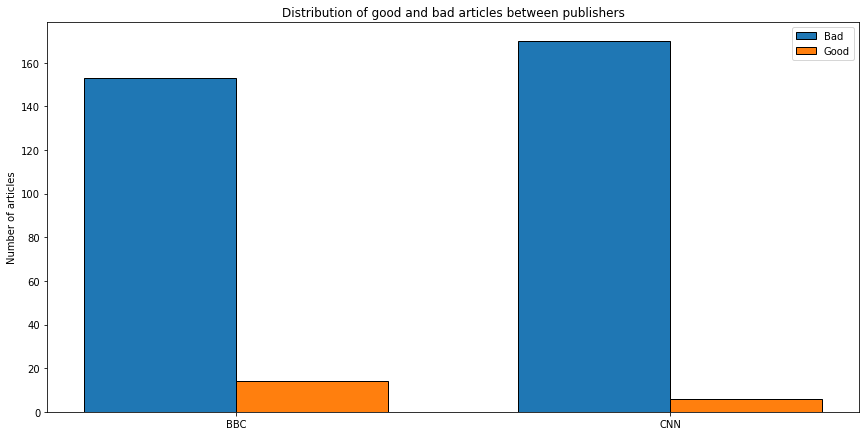

In [13]:
x = np.sort(np.unique(df.publisher.unique()))
published = df.groupby('sentiment').publisher.value_counts()
y = {}
for sent in df.sentiment.unique():
    keys = list(published[sent].keys())
    vals = list(published[sent].values)
    # Insert missing values
    if len(keys) < len(x):
        for x_value in x:
            if x_value not in keys:
                keys.append(x_value)
                vals.append(0)

    _, vals = zip(*sorted(zip(keys, vals)))
    y[sent] = vals

bar_adjacent_labels(
    x, y,
    title='Distribution of good and bad articles between publishers',
    ylabel='Number of articles')

***
### Good and bad news in dependence of text length

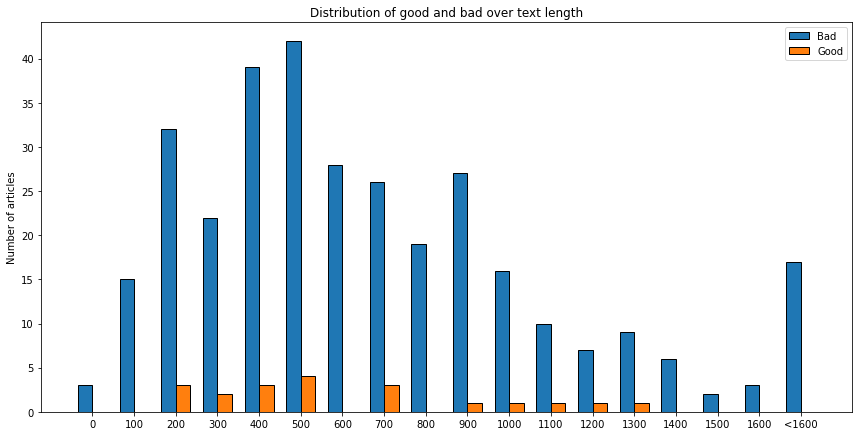

In [14]:
# Get textlength and bin text length
df['text_length'] = [100*int(len(text.split(' '))/100) for text in df.text]
# Put textlength > 1600 together
df.text_length = [l if l <= 1600 else 1700 for l in df.text_length]
x = np.sort(np.unique(df.text_length.unique()))
published = df.groupby('sentiment').text_length.value_counts()
y = {}
for sent in df.sentiment.unique():
    keys = list(published[sent].keys())
    vals = list(published[sent].values)
    # Insert missing values
    if len(keys) < len(x):
        for x_value in x:
            if x_value not in keys:
                keys.append(x_value)
                vals.append(0)

    _, vals = zip(*sorted(zip(keys, vals)))
    y[sent] = vals

# Rename highest x
x = [str(x_) for x_ in x]
x[-1] = '<1600'

bar_adjacent_labels(
    x, y,
    title='Distribution of good and bad over text length',
    ylabel='Number of articles')

***
### Travel?!?

In [15]:
df[df.category == 'travel'].title.values

array(['Covid: What are the rules that mean Boris Johnson has to self-isolate?',
       "Brexit: What's happening and what comes next?",
       "Man warned by police after shouting 'wakey wakey' in Gosport",
       'Coronavirus: Germany hails couch potatoes in new videos',
       'Covid: What is mass testing and how does it work?',
       'Coronavirus: How does Covid-19 test-and-trace work?',
       "Coronavirus: Doctors spell out how to exit England's lockdown",
       'Covid: How will university students go home for Christmas?',
       'Baccara would re-record Yes Sir, I Can Boogie as Scotland anthem',
       'Platinum Jubilee: MPs and peers search for gift fit for the Queen',
       'EasyJet slumps to first annual loss amid pandemic',
       'Covid-19: Heart deaths increase and testing for care home visitors',
       "Duke's birthday wishes for Prince Charles",
       'Covid symptoms: Is it a cold, flu or coronavirus?',
       "Covid: Leicester's lockdown Diwali 'is like our Christm

Corona news often contains airports etc...
Dataset for fit is from 2015, no corona yet.

In [16]:
from categorizer import Categorizer
categorizer = Categorizer(show_words=True)

In [27]:
category, words = categorizer.pred(df.text.values[300])

In [28]:
category

array(['politics'], dtype=object)

In [29]:
words

[['politic', 'campaign', 'state', 'rep', 'governor']]